# Stock Market Movement using Transformers

Here, we analyse how World News affects the US Stock Market using NLP.
Things to note is that, dataset contains 25 top headlines for each day and whether the DJIA went up or down that day, i.e Positive or Negative Sentiment.


In [1]:


import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/stocknews/upload_DJIA_table.csv
/kaggle/input/stocknews/Combined_News_DJIA.csv
/kaggle/input/stocknews/RedditNews.csv



Label "1" is when DJIA Adj Close value rose or stayed as the same.
Label "0" is when DJIA Adj Close value decreased.
                                                                                             

In [2]:
import pandas as pd
 
df = pd.read_csv('/kaggle/input/stocknews/Combined_News_DJIA.csv')

In [3]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

# Preprocessing the data 

In [5]:
df = df.drop(['Date'], axis=1)
df.head()

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...",...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the

In [6]:
df_columns = df.columns
print(df_columns)

Index(['Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8',
       'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16',
       'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24',
       'Top25'],
      dtype='object')


In [12]:
columns = ['Top1']

In [13]:
df['combined_news'] = df[columns].apply(lambda row:'.'.join(row.values.astype(str)), axis=1)

In [14]:
df = df.drop(columns, axis=1)

In [15]:
df.head()

,Label,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,combined_news
0,0,b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","b""Georgia 'downs two Russian warplanes' as cou..."
1,1,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",b'Why wont America and Nato help us? If they w...
2,0,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man...",b'Remember that adorable 9-year-old who sang a...
3,0,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',"b""The commander of a Navy air reconnaissance s...","b""92% of CNN readers: Russia's actions in Geor...",...,b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...,b' U.S. refuses Israel weapons to attack Iran:...
4,1,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in So

In [18]:
df.head()

,Label,combined_news
0,0,"b""Georgia 'downs two Russian warplanes' as cou..."
1,1,b'Why wont America and Nato help us? If they w...
2,0,b'Remember that adorable 9-year-old who sang a...
3,0,b' U.S. refuses Israel weapons to attack Iran:...
4,1,b'All the experts admit that we should legalis...


# Data Analysis 



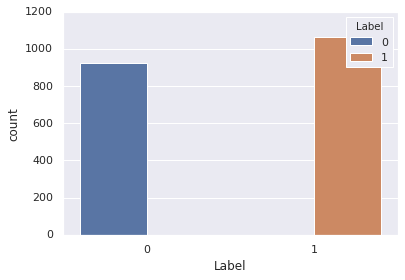

In [21]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

ax = sns.countplot(x='Label', hue='Label', data=df)

Finding out the most common words when DJIA goes up or down


In [67]:
from collections import Counter

data_djia_up = df[df['Label']==1].copy()
data_djia_down = df[df['Label']==0].copy()

In [23]:
print(data_djia_up[:2])

   Label                                      combined_news
1      1  Why wont America and Nato help us? If they won...
4      1  All the experts admit that we should legalise ...


In [24]:
print(data_djia_down[:2])

   Label                                      combined_news
0      0  Georgia 'downs two Russian warplanes' as count...
2      0  Remember that adorable 9-year-old who sang at ...


# Cleaning the data and removing stopwords

In [25]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [26]:
from nltk.corpus import stopwords


["you've", "you'll", "you'd", 'your', 'yours']


In [28]:
def punctuation_stopwords_removal(news_article):
    remove_punctuation = [ch for ch in news_article if ch not in string.punctuation]
    remove_punctuation = "".join(remove_punctuation).split()
    filtered_news_article = [word.lower() for word in remove_punctuation if word.lower() not in stopwords.words('english')]
    return filtered_news_article

In [72]:
data_djia_up.loc[:, 'combined_news'] = data_djia_up['combined_news'].apply(punctuation_stopwords_removal)
words_djia_up = data_djia_up['combined_news'].tolist()
print(data_djia_up[:1])

   Label                                      combined_news
1      1  [wont, america, nato, help, us, wont, help, us...


In [73]:
words_djia_up[:3]

[['wont',
  'america',
  'nato',
  'help',
  'us',
  'wont',
  'help',
  'us',
  'help',
  'iraq'],
 ['experts', 'admit', 'legalise', 'drugs'],
 ['mom',
  'missing',
  'gay',
  'man',
  'bad',
  'hes',
  '21yearold',
  'cheerleader',
  'theyd',
  'still',
  'looking']]

In [74]:
data_djia_down.loc[:, 'combined_news'] = data_djia_down['combined_news'].apply(punctuation_stopwords_removal)
words_djia_down = data_djia_down['combined_news'].tolist()
print(words_djia_down[:2])

[['georgia', 'downs', 'two', 'russian', 'warplanes', 'countries', 'move', 'brink', 'war'], ['remember', 'adorable', '9yearold', 'sang', 'opening', 'ceremonies', 'fake']]


In [75]:
djia_up_list = []
for sublist in words_djia_up:
    for words in sublist:
        djia_up_list.append(words)

djia_down_list = []
for sublist in words_djia_down:
    for words in sublist:
        djia_down_list.append(words)
        

In [77]:
print('DJIA up list : {}'.format(len(djia_up_list)))
print('DJIA down list : {}'.format(len(djia_down_list)))
djia_up_list

DJIA up list : 13443
DJIA down list : 11955


['wont',
 'america',
 'nato',
 'help',
 'us',
 'wont',
 'help',
 'us',
 'help',
 'iraq',
 'experts',
 'admit',
 'legalise',
 'drugs',
 'mom',
 'missing',
 'gay',
 'man',
 'bad',
 'hes',
 '21yearold',
 'cheerleader',
 'theyd',
 'still',
 'looking',
 'two',
 'elderly',
 'chinese',
 'women',
 'sentenced',
 'year',
 'reeducation',
 'labor',
 'sought',
 'permit',
 'demonstrate',
 'official',
 'olympic',
 'protest',
 'area',
 'british',
 'resident',
 'held',
 'guantanamo',
 'bay',
 'wins',
 'legal',
 'battle',
 'force',
 'foreign',
 'office',
 'reveal',
 'torture',
 'evidence',
 'syria',
 'says',
 'ready',
 'put',
 'russian',
 'missile',
 'system',
 'soil',
 'counterweight',
 'us',
 'plans',
 'deploy',
 'missile',
 'shield',
 'poland',
 'czech',
 'republic',
 'north',
 'korea',
 'halts',
 'denuclearisation',
 'us',
 'fails',
 'remove',
 'list',
 'states',
 'sponsoring',
 'terrorism',
 'photos',
 '15yearold',
 'iraqi',
 'suicide',
 'bomber',
 'gave',
 'military',
 'help',
 'georgia',
 'declar

In [79]:
djia_up_counter = Counter(djia_up_list)
djia_down_counter = Counter(djia_down_list)

djia_up_top_30_words = pd.DataFrame(djia_up_counter.most_common(30), columns=['word', 'count'])
top_30_words_down = pd.DataFrame(djia_down_counter.most_common(30), columns=['word', 'count'])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

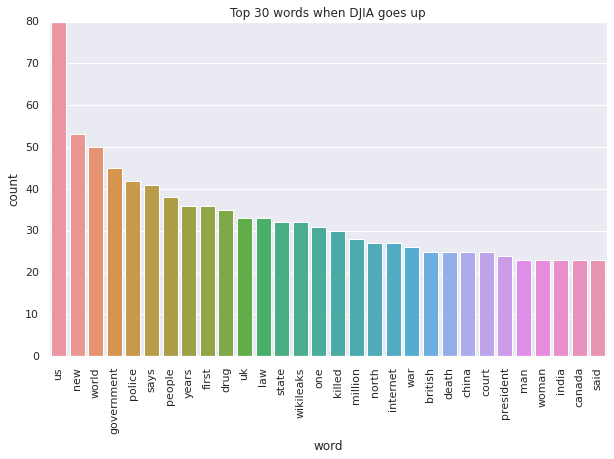

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=djia_up_top_30_words, ax=ax)
plt.title('Top 30 words when DJIA goes up')
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

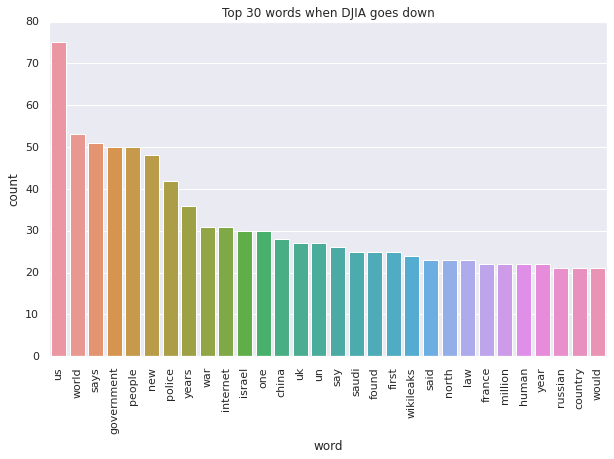

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=top_30_words_down, ax=ax)
plt.title('Top 30 words when DJIA goes down')
plt.xticks(rotation='vertical')

# Using DistilBERT

In [83]:
df.head()

,Label,combined_news
0,0,Georgia 'downs two Russian warplanes' as count...
1,1,Why wont America and Nato help us? If they won...
2,0,Remember that adorable 9-year-old who sang at ...
3,0,U.S. refuses Israel weapons to attack Iran: r...
4,1,All the experts admit that we should legalise ...


In [84]:
!pip install transformers

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

## Load HuggingFace DistilBERT model


In [89]:
# For DistilBERT
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

# load pre-trained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

# Tokenization and Padding


In [90]:
tokenized = df['combined_news'].apply((lambda x: tokenizer.encode(x, add_special_token=True)))
max_len = 0
for i in tokenized.values:
    if len(i)>max_len:
        max_len = len(i)
print(max_len)
padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

78


In [48]:
print(tokenized.shape)

(1989,)


In [91]:
tokenized[:1]

0    [101, 4108, 1005, 12482, 2048, 2845, 24136, 20...
Name: combined_news, dtype: object

### Masking


In [92]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(1989, 78)

In [93]:
input_ids = torch.tensor(padded)
attention_mask = torch.tensor(attention_mask)
with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [94]:
features = last_hidden_states[0][:, 0, :].numpy()
labels = df['Label']

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [97]:
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)

LogisticRegression()

In [98]:
lr_clf.score(test_features, test_labels)

0.4919678714859438

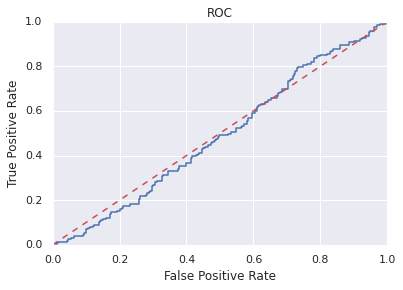

In [99]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(test_labels, lr_clf.predict(test_features))
fpr, tpr, thresholds = roc_curve(test_labels, lr_clf.predict_proba(test_features)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

# Things to do to improve:
1. Make own web-scraping tool to collect the dataset.
2. Add Dense layers on top of the Pre-trained BERT Model and fine-tune the Dataset.
3. Use a bigger BERT Model.
4. Fix glitches in the Dataset.
5. In addition, implement Adeversial Training and Ensemble Models.